# Imdb Review Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Loading the data
imdb,info = tfds.load("imdb_reviews",as_supervised=True,with_info=True)

In [3]:
train_data , test_data = imdb['train'] , imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

    
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [4]:
vocab_size = 10000
embedding_dim = 16
max_len = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
sequences = tokenizer.texts_to_sequences(training_sentences)

padded = pad_sequences(sequences,maxlen=max_len,truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_len)



In [7]:
padded.shape,testing_padded.shape

((25000, 120), (25000, 120))

In [9]:
word_index = tokenizer.word_index

In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(padded,training_labels_final,epochs=20,validation_data = (testing_padded,testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 186us/sample - loss: 0.4988 - accuracy: 0.7412 - val_loss: 0.3417 - val_accuracy: 0.8508
Epoch 2/20
25000/25000 [==============================] - 4s 162us/sample - loss: 0.2442 - accuracy: 0.9045 - val_loss: 0.3723 - val_accuracy: 0.8376
Epoch 3/20
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0951 - accuracy: 0.9757 - val_loss: 0.4470 - val_accuracy: 0.8288
Epoch 4/20
25000/25000 [==============================] - 4s 157us/sample - loss: 0.0262 - accuracy: 0.9964 - val_loss: 0.5232 - val_accuracy: 0.8265
Epoch 5/20
25000/25000 [==============================] - 4s 154us/sample - loss: 0.0098 - accuracy: 0.9988 - val_loss: 0.5806 - val_accuracy: 0.8256
Epoch 6/20
25000/25000 [==============================] - 4s 160us/sample - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.6390 - val_accuracy: 0.8240
Epoch 7/20
25000/25000 [==========================

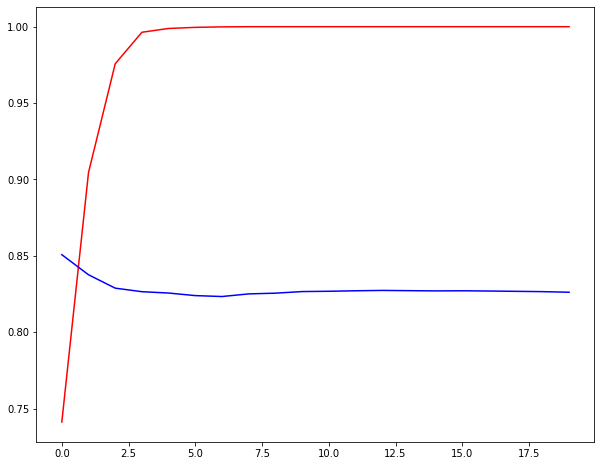

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'b')


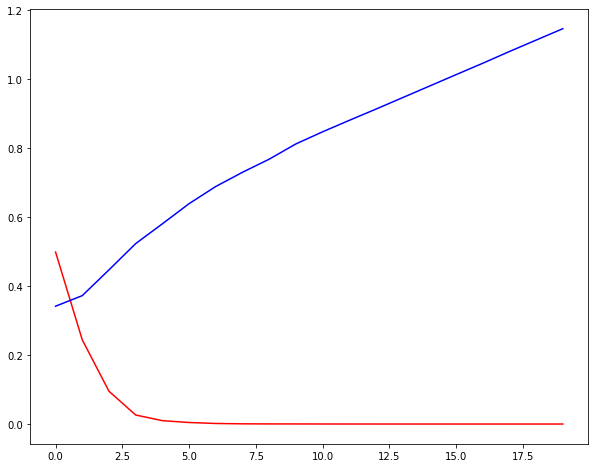

In [12]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')

## We can clearly observe that we are Overfitting the Data!!

In [16]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # shape : (vocab_size , embedding_dim)

(10000, 16)